In [1]:
#need 2 models
    #1.  Predict completely new products -373 prods generating 15k submissions
    #2.  Predict sales for those that have sales in the past, but not in certain shops
#This EDA focuses on the 2nd element


In [2]:
#need to look at new products and see how they change
#grab a product first date - & look at how sales changed over time and how many shops
#example item= 22169 (201403 first)
#example item2= 22165 (201308)

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os
import datetime as dt
dateCols = ['date']
train2=pd.read_csv("/home/cdsw/train_plus_not_imputted.csv",parse_dates=dateCols)
train2["TotalRevenue"]=train2.item_cnt_day*train2.item_price
train2["Month"]=train2.date.dt.month
train2["Year"]=train2.date.dt.year
train2['YM'] = train2['Year']*100+train2["Month"]

# #create an average per month - see how it changes
# sales_per_item_PM= train2.groupby(['item_id', "shop_id",'YM'])['item_cnt_day',"TotalRevenue" ].sum().reset_index()
# sales_per_item_PM["AvPrice"]=sales_per_item_PM.TotalRevenue/sales_per_item_PM.item_cnt_day
# sales_per_item_PM["id"]=sales_per_item_PM.item_id.astype("str")+"_"+sales_per_item_PM.shop_id.astype("str")

In [4]:
#need to look at which products start increasing the number of shops they sell in and when - is it time based?
#or is it based on the number of sales they make
#how to find out what this should be? start by identifying which products increase the number of shops they sell in

#per product, per month, number of shops
shops_per_item_PM= train2.groupby(['item_id',"shop_id",'YM'])['shop_id'].count().reset_index(name="NumTrans")
shops_per_item_PM2=shops_per_item_PM.groupby(["item_id","YM"])["shop_id"].count().reset_index(name="Num_Shops")
shops_per_item_PM2["YM2"]="_"+shops_per_item_PM2.YM.astype("str")
shops_per_item_PM3=shops_per_item_PM2.pivot_table(index=["item_id"],columns="YM2",values="Num_Shops", fill_value=0).reset_index()
shops_per_item_PM3.tail(20)

YM2,item_id,_201301,_201302,_201303,_201304,_201305,_201306,_201307,_201308,_201309,...,_201503,_201504,_201505,_201506,_201507,_201508,_201509,_201510,_201511,_201512
21787,22150,1,1,0,1,0,1,11,9,4,...,0,0,0,0,0,0,0,0,0,0
21788,22151,31,27,16,15,13,12,12,7,11,...,0,0,0,0,0,0,0,0,0,0
21789,22152,4,2,11,9,6,10,10,3,2,...,0,0,0,0,0,0,0,0,0,0
21790,22153,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
21791,22154,8,5,2,2,5,0,0,3,1,...,1,1,1,0,6,2,1,3,1,1
21792,22155,2,1,1,11,14,5,3,2,8,...,0,0,0,1,0,0,1,0,0,0
21793,22156,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21794,22157,0,2,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
21795,22158,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
21796,22159,0,0,0,0,0,0,0,0,0,...,1,0,5,1,1,1,1,1,0,2


In [5]:
#take cuts of the data, from 201306 onwards
# 201306, where all zero before hand, and then examine to see how shop sales on average develop... 
#are there average lifespans?
new1306=shops_per_item_PM3[(shops_per_item_PM3["_201306"] !=0) 
                           & (shops_per_item_PM3.iloc[:,1]==0)
                          &(shops_per_item_PM3.iloc[:,2]==0)
                          &(shops_per_item_PM3.iloc[:,3]==0)
                          &(shops_per_item_PM3.iloc[:,4]==0)
                          &(shops_per_item_PM3.iloc[:,5]==0)]
#next time, find those that start in a month and restrict to those



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


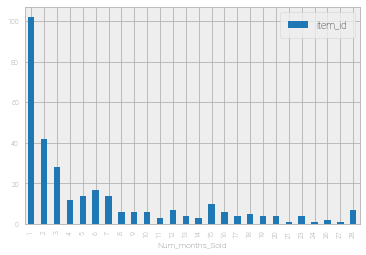

In [6]:
new1306["Num_months_Sold"]=new1306.loc[:,"_201306":"_201509"].astype(bool).sum(axis=1)
new1306.groupby(["Num_months_Sold"])["item_id"].count().reset_index().plot(kind="bar",x="Num_months_Sold",y="item_id" )

#new1306[new1306.item_id==273].transpose()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


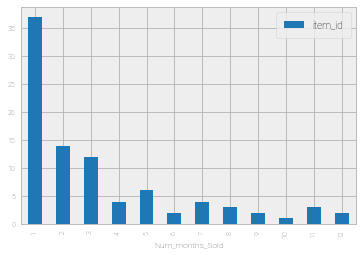

In [7]:
#so lots of new products are only ever sold in one month
#GOAL REMINDER: we are interested in products that have been sold elsewhere and will extend into other shops
#first check that this is a similar picture across prods
#read in the first product dates ( created in EDA_J2_06)
firsts=pd.read_csv("/home/cdsw/firsts.csv")
firsts.rename(columns={"YM":"FirstSale"}, inplace=True)
shops_per_item_PM4=pd.merge(shops_per_item_PM3,firsts[["item_id","FirstSale"]],how="left", on="item_id")
new1410=shops_per_item_PM4[shops_per_item_PM4.FirstSale==201410]
new1410["Num_months_Sold"]=new1410.loc[:,"_201410":"_201509"].astype(bool).sum(axis=1)
new1410.groupby(["Num_months_Sold"])["item_id"].count().reset_index().plot(kind="bar",x="Num_months_Sold",y="item_id" )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


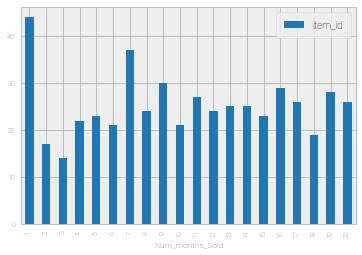

In [8]:
new1402=shops_per_item_PM4[shops_per_item_PM4.FirstSale==201402]
new1402["Num_months_Sold"]=new1402.loc[:,"_201402":"_201509"].astype(bool).sum(axis=1)
new1402.groupby(["Num_months_Sold"])["item_id"].count().reset_index().plot(kind="bar",x="Num_months_Sold",y="item_id" )

In [16]:
sshpdev1306_2.head()

,item_id,YM,Num_Shops,YM2
3479,483,201306,1,_201306
5130,707,201306,1,_201306
77071,6461,201306,1,_201306
77016,6458,201306,1,_201306
76045,6382,201306,1,_201306


In [18]:
#so what doing with this info now - many are short lived... 
#but want to know those that live a little longer (bc there are some PRODUCTS which were sold prior but not in some shops)
#of these how does the number of shops change?

#for each of these datasets, reduce to where Num_m >3, and then do a scatter of date x and Num
shpdev1306=shops_per_item_PM2[shops_per_item_PM2.item_id.isin(new1306.item_id[new1306.Num_months_Sold>3])].sort_values("YM",ascending=True)
#consider merging num months sold and col it by that
shpdev1306_2=shpdev1306[(shpdev1306.YM<=201309) &(shpdev1306.YM>=201303)]

In [33]:
#re grab firsts, add dates and scatter by dates... if cann
#rename the columns in firsts
firsts.rename(columns={"Day":"FirstSaleD","date":"FirstSaledt"},inplace=True)
#then add the first dates for a scatter if want
shpdev1306_3=pd.merge(shpdev1306_2,firsts,how="left",on="item_id")
#then re merge to add in the NUm MOnths sold 
shpdev1306_4=pd.merge(shpdev1306_3, new1306[["item_id","Num_months_Sold"]],how="left", on="item_id")

#merge again to add in the Amounts sold (from where)
sales_PM=train2.groupby(["item_id", "YM"])["item_cnt_day"].sum().reset_index(name="SoldPM")
shpdev1306_5=pd.merge(shpdev1306_4,sales_PM[["item_id","YM","SoldPM"]],how="left", on=["YM","item_id"])
#create a variable that allows you to effectively jitter the data set
shpdev1306_5["YM_plus"]=shpdev1306_5.YM.astype("str")+"_"+shpdev1306_5.FirstSaleD.astype("str")
# recreate the 2 plotly charts

#pivot the final by item id and ym2 and num shops as sum - sum is ok bc its per item
# then run a group by the ym2 to get the view, item as count - 

In [34]:
import plotly.express as px

fig = px.scatter(shpdev1306_5, x="YM_plus", y="Num_Shops", opacity=0.4,color="item_id",
                 size='Num_months_Sold', hover_data=['SoldPM'])
fig.show()


In [25]:
fig=px.scatter(shpdev1306_5,x="YM2",y="Num_Shops", opacity=0.4,color="item_id", size="SoldPM",hover_data=["Num_months_Sold"])
fig.show()

In [29]:
#see that the majority stick around 1 or low number of shops... need to see flow.
#pivot the data out by YM2
flo=shpdev1306_5.pivot_table(index=["item_id"], columns="YM2",values="Num_Shops", fill_value=0).reset_index()
#group by the columns names
flo2=flo.groupby(["_201306","_201307","_201308","_201309"])["item_id"].count().reset_index(name="ComboCount")
flo2

,_201306,_201307,_201308,_201309,ComboCount
0,1,0,0,0,42
1,1,0,0,1,11
2,1,0,1,0,13
3,1,0,1,1,8
4,1,0,1,2,1
5,1,0,2,0,2
6,1,0,3,1,1
7,1,1,0,0,12
8,1,1,0,1,8
9,1,1,0,4,1


In [13]:
import plotly.express as px
iris = px.data.iris()
fig = px.scatter(sshpdev1306_2, x="YM2", y="Num_Shop", color="species",
                 size='petal_length', hover_data=['petal_width'])
fig.show()

ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['item_id', 'YM', 'Num_Shops', 'YM2'] but received: Num_Shop